# Определение рыночной стоимости объектов недвижимости.

## Получение и изучение данных

### Поставленная задача и исходные данные

Предоставлены данные сервиса Яндекс Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктах за несколько лет в файле `real_estate_data.csv`

Нужно научиться определять рыночную стоимость объектов недвижимости.

Задача — установить параметры.

По каждой квартире на продажу доступны два вида данных:

- первые вписаны пользователем,
- вторые — получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма.

Результаты исследования позволят построить автоматизированную систему: она отследит аномалии и мошенническую деятельность.

**Описание данных**
- `airports_nearest` — расстояние до ближайшего аэропорта в метрах (м)
- `balcony` — число балконов
- `ceiling_height` — высота потолков (м)
- `cityCenters_nearest` — расстояние до центра города (м)
- `days_exposition` — сколько дней было размещено объявление (от публикации до снятия)
- `first_day_exposition` — дата публикации
- `floor` — этаж
- `floors_total` — всего этажей в доме
- `is_apartment` — апартаменты (булев тип)
- `kitchen_area` — площадь кухни в квадратных метрах (м²)
- `last_price` — цена на момент снятия с публикации
- `living_area` — жилая площадь в квадратных метрах (м²)
- `locality_name` — название населённого пункта
- `open_plan` — свободная планировка (булев тип)
- `parks_around3000` — число парков в радиусе 3 км
- `parks_nearest` — расстояние до ближайшего парка (м)
- `ponds_around3000` — число водоёмов в радиусе 3 км
- `ponds_nearest` — расстояние до ближайшего водоёма (м)
- `rooms` — число комнат
- `studio` — квартира-студия (булев тип)
- `total_area` — площадь квартиры в квадратных метрах (м²)
- `total_images` — число фотографий квартиры в объявлении

Пояснение: апартаменты — это нежилые помещения, которые не относятся к жилому фонду, но имеют необходимые условия для проживания.

### Обзор данных

Открытие таблицы и изучение общей информации о данных

<ins>Импортируем библиотеки и получим общую информацию о данных</ins>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
df = pd.read_csv('https://code.s3.yandex.net/datasets/real_estate.csv', sep='\t')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

Из анализа данным методом видно:
- 1)
    - `first_day_exposition` (дата публикации) тип `object` - для корректного анализа необходимо поменять тип на `datetime64`, замена типа следует из наименования столбца

- 2) 
    - `ceiling_height` (высота потолков),
    - `living_area` (жилая площадь в квадратных метрах (м²)),
    - `kitchen_area` (площадь кухни в квадратных метрах (м²)),
    - `locality_name` (название населённого пункта),
    - `airports_nearest` (расстояние до ближайшего аэропорта в метрах (м)),
    - `cityCenters_nearest` (расстояние до центра города (м)),
    - `parks_nearest` (расстояние до ближайшего парка (м)),
    - `ponds_nearest` (расстояние до ближайшего водоёма (м))    
    есть пропуски значений - для корректного анализа необходимо заполнить пропуски там, где уместно

- 3)
    - `floors_total` (всего этажей в доме),
    - `balcony`(число балконов),
    - `parks_around3000`(число парков в радиусе 3 км),
    - `ponds_around3000`(число водоёмов в радиусе 3 км),
    - `days_exposition`(сколько дней было размещено объявление (от публикации до снятия))    
    есть пропуски значений, тип `float64` - для корректного анализа необходимо заполнить пропуски там, где уместно, поменять тип на `int64 `, замена типа следует из наименования столбца

- 4)
    - `is_apartment` (апартаменты (булев тип)) есть пропуски значений, тип `object` - для корректного анализа необходимо заполнить пропуски, поменять тип на `bool`, замена типа следует из наименования столбца
- 5)
    - `cityCenters_nearest`, `parks_around3000`, `ponds_around3000` необходимо привести к змеиному регистру

<ins>Выведем на экран первые 20 строк</ins>

In [2]:
df.head(20)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.00,2019-03-07T00:00:00,3,2.70,16.0,51.00,8,NaN,...,25.00,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.40,2018-12-04T00:00:00,1,NaN,11.0,18.60,1,NaN,...,11.00,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.00,2015-08-20T00:00:00,2,NaN,5.0,34.30,4,NaN,...,8.30,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.00,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.00,2018-06-19T00:00:00,2,3.03,14.0,32.00,13,NaN,...,41.00,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0
5,10,2890000.0,30.40,2018-09-10T00:00:00,1,NaN,12.0,14.40,5,NaN,...,9.10,NaN,городской посёлок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0
6,6,3700000.0,37.30,2017-11-02T00:00:00,1,NaN,26.0,10.60,6,NaN,...,14.40,1.0,посёлок Парголово,52996.0,19143.0,0.0,NaN,0.0,NaN,155.0
7,5,7915000.0,71.60,2019-04-18T00:00:00,2,NaN,24.0,NaN,22,NaN,...,18.90,2.0,Санкт-Петербург,23982.0,11634.0,0.0,NaN,0.0,NaN,NaN
8,20,2900000.0,33.16,2018-05-23T00:00:00,1,NaN,27.0,15.43,26,NaN,...,8.81,NaN,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,189.0
9,18,5400000.0,61.00,2017-02-26T00:00:00,3,2.50,9.0,43.60,7,NaN,...,6.50,2.0,Санкт-Петербург,50898.0,15008.0,0.0,NaN,0.0,NaN,289.0


Из анализа этим методом сложно сделать новые выводы. Не все столбцы отображаются, применим соответствующий код для отображения всех столбцов:

In [3]:
pd.set_option('display.max_columns', None)

In [4]:
df.head(50)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.00,2019-03-07T00:00:00,3,2.70,16.0,51.00,8,NaN,False,False,25.00,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.40,2018-12-04T00:00:00,1,NaN,11.0,18.60,1,NaN,False,False,11.00,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.00,2015-08-20T00:00:00,2,NaN,5.0,34.30,4,NaN,False,False,8.30,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.00,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,False,False,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.00,2018-06-19T00:00:00,2,3.03,14.0,32.00,13,NaN,False,False,41.00,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0
5,10,2890000.0,30.40,2018-09-10T00:00:00,1,NaN,12.0,14.40,5,NaN,False,False,9.10,NaN,городской посёлок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0
6,6,3700000.0,37.30,2017-11-02T00:00:00,1,NaN,26.0,10.60,6,NaN,False,False,14.40,1.0,посёлок Парголово,52996.0,19143.0,0.0,NaN,0.0,NaN,155.0
7,5,7915000.0,71.60,2019-04-18T00:00:00,2,NaN,24.0,NaN,22,NaN,False,False,18.90,2.0,Санкт-Петербург,23982.0,11634.0,0.0,NaN,0.0,NaN,NaN
8,20,2900000.0,33.16,2018-05-23T00:00:00,1,NaN,27.0,15.43,26,NaN,False,False,8.81,NaN,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,189.0
9,18,5400000.0,61.00,2017-02-26T00:00:00,3,2.50,9.0,43.60,7,NaN,False,False,6.50,2.0,Санкт-Петербург,50898.0,15008.0,0.0,NaN,0.0,NaN,289.0


Подтвердились предыдущие гипотезы.

<ins>Получим сводку числовых значений:</ins>

In [5]:
df.describe()

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
count,23699.000000,2.369900e+04,23699.000000,23699.000000,14504.000000,23613.000000,21796.000000,23699.000000,21421.000000,12180.000000,18157.000000,18180.000000,18181.000000,8079.000000,18181.000000,9110.000000,20518.000000
mean,9.858475,6.541549e+06,60.348651,2.070636,2.771499,10.673824,34.457852,5.892358,10.569807,1.150082,28793.672193,14191.277833,0.611408,490.804555,0.770255,517.980900,180.888634
std,5.682529,1.088701e+07,35.654083,1.078405,1.261056,6.597173,22.030445,4.885249,5.905438,1.071300,12630.880622,8608.386210,0.802074,342.317995,0.938346,277.720643,219.727988
min,0.000000,1.219000e+04,12.000000,0.000000,1.000000,1.000000,2.000000,1.000000,1.300000,0.000000,0.000000,181.000000,0.000000,1.000000,0.000000,13.000000,1.000000
25%,6.000000,3.400000e+06,40.000000,1.000000,2.520000,5.000000,18.600000,2.000000,7.000000,0.000000,18585.000000,9238.000000,0.000000,288.000000,0.000000,294.000000,45.000000
50%,9.000000,4.650000e+06,52.000000,2.000000,2.650000,9.000000,30.000000,4.000000,9.100000,1.000000,26726.000000,13098.500000,0.000000,455.000000,1.000000,502.000000,95.000000
75%,14.000000,6.800000e+06,69.900000,3.000000,2.800000,16.000000,42.300000,8.000000,12.000000,2.000000,37273.000000,16293.000000,1.000000,612.000000,1.000000,729.000000,232.000000
max,50.000000,7.630000e+08,900.000000,19.000000,100.000000,60.000000,409.700000,33.000000,112.000000,5.000000,84869.000000,65968.000000,3.000000,3190.000000,3.000000,1344.000000,1580.000000


- `ceiling_height` максимальное значение 100 м и минимальное 1 м - явные аномалии для высоты потолков,
- `total_area` максимальное значение 900 м² возможно слишком большое значение для площади квартиры (учитывая медиану и среднее), влияющее на результаты анализа
- `rooms` максимальное значение 19 комнат (учитывая медиану и среднее) также может отрицательно повлиять на адекватный результат анализа
- `living_area` максимальное значение 409 м² (учитывая медиану и среднее) необходимо проверять

## Предобработка данных

### Переименование столбцов

Наименования столбцов `cityCenters_nearest`, `parks_around3000`, `ponds_around3000` необходимо привести к змеиному регистру:

In [6]:
df = df.rename(columns={'cityCenters_nearest': 'city_centers_nearest',
                        'parks_around3000': 'parks_around_3000',
                        'ponds_around3000': 'ponds_around_3000'})

In [7]:
df.head(1)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around_3000,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition
0,20,13000000.0,108.0,2019-03-07T00:00:00,3,2.7,16.0,51.0,8,NaN,False,False,25.0,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN


Наименования столбцов приведены к змеиному регистру.

### Заполнение пропусков

При изучении исходных данных во многих столбцах обнаружены пропуски. Определим их долю в процентах к значениям без пропусков.

In [8]:
columns_with_NaN = ['ceiling_height','living_area', 'kitchen_area',
                    'locality_name', 'airports_nearest', 'city_centers_nearest',
                    'parks_nearest', 'ponds_nearest', 'floors_total', 'balcony',
                   'parks_around_3000', 'ponds_around_3000', 'days_exposition', 'is_apartment']
for column in columns_with_NaN:    
    print (f'Доля пропущенных значений в столбце {column}: {df[column].isna().mean():.1%}')

Доля пропущенных значений в столбце ceiling_height: 38.8%
Доля пропущенных значений в столбце living_area: 8.0%
Доля пропущенных значений в столбце kitchen_area: 9.6%
Доля пропущенных значений в столбце locality_name: 0.2%
Доля пропущенных значений в столбце airports_nearest: 23.4%
Доля пропущенных значений в столбце city_centers_nearest: 23.3%
Доля пропущенных значений в столбце parks_nearest: 65.9%
Доля пропущенных значений в столбце ponds_nearest: 61.6%
Доля пропущенных значений в столбце floors_total: 0.4%
Доля пропущенных значений в столбце balcony: 48.6%
Доля пропущенных значений в столбце parks_around_3000: 23.3%
Доля пропущенных значений в столбце ponds_around_3000: 23.3%
Доля пропущенных значений в столбце days_exposition: 13.4%
Доля пропущенных значений в столбце is_apartment: 88.3%


In [9]:
df[df['city_centers_nearest'].isna()==True]['locality_name'].head(10)

5               городской посёлок Янино-1
8                          посёлок Мурино
12                              Сертолово
22                        деревня Кудрово
30                               Коммунар
37    поселок городского типа Красный Бор
38                         посёлок Мурино
47                                Гатчина
60                         посёлок Мурино
62                              Сертолово
Name: locality_name, dtype: object

Причины пропусков:
- `ceiling_height` (высота потолков): наличие второго света, различная высота потолков в пределах квартиры, доля пропусков велика, скорее всего из-за того, что это неопределяющий параметр для продажи,
- `living_area` (жилая площадь в квадратных метрах (м²)): это важный параметр для определения рыночной стоимости, причина пропусков - программный сбой или человеческий фактор,
- `kitchen_area` (площадь кухни в квадратных метрах (м²)): возможно, продаются квартиры со свободной планировкой и площадь кухни неопределена,
- `locality_name` (название населённого пункта): доля пропусков невелика, возможно, намеренно не заполнили, т.к. весь датасет для Санкт-Петербурге и соседних населённых пунктов, возможно не заполнено, т.к. если населенный пункт не Санкт-Петербург, то в Ленинградской области рыночная стоимость не зависит от населенного пункта,
- `airports_nearest` (расстояние до ближайшего аэропорта в метрах (м)): скорее всего из-за того, что это неопределяющий параметр для продажи и его часто не заполняют умышленно либо сбой автозаполнения,
- `city_centers_nearest` (расстояние до центра города (м)): возможно, данный параметр не заполняют умышленно, к примеру, большинство населенных пунктов, где не указано расстояние до центра - довольно отдалённые от центра города (к примеру, Гатчина, а также сёла, деревни).
- `parks_nearest` (расстояние до ближайшего парка (м)): возможно, не заполняют для квартир рядом с парком либо сбой автозаполнения, процент пропусков велик, скорее всего это неопределяющий параметр для продажи, и его не заполняют умышленно,
- `ponds_nearest` (расстояние до ближайшего водоёма (м)) : аналогично `parks_nearest`,
- `floors_total` (всего этажей в доме): доля пропусков невелика, возможно, человеческий фактор, не придали значения при заполнении,
- `balcony`(число балконов): процент пропусков велик, скорее всего, не указывали количество при отсутствии балконов,
- `parks_around_3000`(число парков в радиусе 3 км): скорее всего, не указывали количество при отсутствии парков,
- `ponds_around_3000`(число водоёмов в радиусе 3 км): аналогично `parks_around_3000`,
- `days_exposition`(сколько дней было размещено объявление (от публикации до снятия)): возможно, не заполнено для активных (неснятых) объявлений, 
- `is_apartment` (апартаменты (булев тип)): процент пропусков значителен, возможно, пропуски означают "неапартаменты".

Для корректного анализа необходимо заполнить пропуски там, где это уместно.
- в `balcony` логично заменить пропуски на 0, т.к. если человек не указал число балконов — скорее всего, их нет,
- в `floors_total`заменим пропуски на 0 для выполения дальнейших расчётов, доля невелика, на анализ не повлияет, даже если гипотеза неверна.

Для других типов данных нет подходящего значения на замену. Пока оставим эти значения пустыми.

In [10]:
zero_columns = ['balcony', 'floors_total']
for zero in zero_columns:
    df[zero] = df[zero].fillna(0)
    print (f'Количество пропущенных значений в столбце {zero}: {len(df[df[zero].isna()])}')    

Количество пропущенных значений в столбце balcony: 0
Количество пропущенных значений в столбце floors_total: 0


### Приведение данных к нужным типам

В столбце `first_day_exposition` (дата публикации) тип `object` - для корректного анализа заменим тип на `datetime64`, замена типа следует из наименования столбца:

In [11]:
df['first_day_exposition'] = pd.to_datetime(df['first_day_exposition'], format='%Y-%m-%dT%H:%M:%S')

В столбцах:
   - `floors_total` (всего этажей в доме),
   - `balcony`(число балконов),
   - `parks_around_3000`(число парков в радиусе 3 км),
   - `ponds_around_3000`(число водоёмов в радиусе 3 км),
   - `days_exposition`(сколько дней было размещено объявление (от публикации до снятия))    

есть пропуски значений, тип `float64` - для корректного анализа заменим тип на `int64 `, замена типа следует из наименования столбца:

In [12]:
another_types = ['floors_total','balcony', 'parks_around_3000', 'ponds_around_3000']
for types in another_types:
    try:
        df[types] = df[types].astype('int')
    except:
        df[types] = df[types].astype('Int64')

В столбце `is_apartment` (апартаменты (булев тип)), тип `object` - для корректного анализа заменим тип на `bool`, замена типа следует из наименования столбца:

In [13]:
df['is_apartment'] = df['is_apartment'].astype('bool')

Проверка

In [14]:
df.dtypes

total_images                     int64
last_price                     float64
total_area                     float64
first_day_exposition    datetime64[ns]
rooms                            int64
ceiling_height                 float64
floors_total                     int32
living_area                    float64
floor                            int64
is_apartment                      bool
studio                            bool
open_plan                         bool
kitchen_area                   float64
balcony                          int32
locality_name                   object
airports_nearest               float64
city_centers_nearest           float64
parks_around_3000                Int64
parks_nearest                  float64
ponds_around_3000                Int64
ponds_nearest                  float64
days_exposition                float64
dtype: object

Приведение данных к нужным типам выполнено.

## Расчет и добавление в таблицу дополнительных столбцов

Посчитайте и добавьте в таблицу

- цену квадратного метра;
- день недели, месяц и год публикации объявления;
- этаж квартиры; варианты — первый, последний, другой;
- соотношение жилой и общей площади, а также отношение площади кухни к общей.

Посчитаем и добавим в таблицу следующее:
- цену квадратного метра

In [15]:
df['meter_area'] = df['last_price']/df['total_area']

In [16]:
df[['meter_area','last_price', 'total_area']].head(3)

,meter_area,last_price,total_area
0,120370.370370,13000000.0,108.0
1,82920.792079,3350000.0,40.4
2,92785.714286,5196000.0,56.0


- день недели, месяц и год публикации объявления;

In [17]:
df['weekday'] = df['first_day_exposition'].dt.weekday
df['month'] = df['first_day_exposition'].dt.month
df['year'] = df['first_day_exposition'].dt.year

In [18]:
df[['first_day_exposition','weekday', 'month', 'year']].head(3)

,first_day_exposition,weekday,month,year
0,2019-03-07,3,3,2019
1,2018-12-04,1,12,2018
2,2015-08-20,3,8,2015


- этаж квартиры; варианты — первый, последний, другой;

In [19]:
def floor_category(row):
    floor = row['floor']
    floors_total = row['floors_total']
    if floor == 1:
        return 'первый'
    if floor == floors_total:
        return 'последний'
    return 'другой'

In [20]:
df['floor_category'] = df.apply(floor_category, axis=1)

In [21]:
df[['floor','weekday', 'floors_total', 'floor_category']].head(3)

,floor,weekday,floors_total,floor_category
0,8,3,16,другой
1,1,1,11,первый
2,4,3,5,другой


- соотношение жилой и общей площади, а также отношение площади кухни к общей.

In [22]:
df['part_living_area'] = df['living_area']/df['total_area']
df['part_kitchen_area'] = df['kitchen_area']/df['total_area']

In [23]:
df[['living_area','kitchen_area', 'total_area', 'part_living_area', 'part_kitchen_area']].head(3)

,living_area,kitchen_area,total_area,part_living_area,part_kitchen_area
0,51.0,25.0,108.0,0.472222,0.231481
1,18.6,11.0,40.4,0.460396,0.272277
2,34.3,8.3,56.0,0.612500,0.148214


Дополнительные столбцы добавлены. Перед переходом на следующий этап проверим наличие явных дубликатов:

In [24]:
df.duplicated().sum()

0

Дубликатов нет. Переходим к исследовательскому анализу.

## Исследовательский анализ данных

### Гистограммы для площади, цены, числа комнат, высоты потолков

Изучим следующие параметры: площадь (`total_area`), цена (`last_price`), число комнат (`rooms`), высота потолков (`ceiling_height `).

In [25]:
df[['total_area', 'last_price', 'rooms', 'ceiling_height']].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   total_area      23699 non-null  float64
 1   last_price      23699 non-null  float64
 2   rooms           23699 non-null  int64  
 3   ceiling_height  14504 non-null  float64
dtypes: float64(3), int64(1)
memory usage: 740.7 KB


In [26]:
df[['total_area', 'last_price', 'rooms', 'ceiling_height']].describe()

,total_area,last_price,rooms,ceiling_height
count,23699.000000,2.369900e+04,23699.000000,14504.000000
mean,60.348651,6.541549e+06,2.070636,2.771499
std,35.654083,1.088701e+07,1.078405,1.261056
min,12.000000,1.219000e+04,0.000000,1.000000
25%,40.000000,3.400000e+06,1.000000,2.520000
50%,52.000000,4.650000e+06,2.000000,2.650000
75%,69.900000,6.800000e+06,3.000000,2.800000
max,900.000000,7.630000e+08,19.000000,100.000000


- `ceiling_height` максимальное значение 100 м явная аномалия для высоты потолков, пропуски пока оставлены без замены
- `total_area` максимальное значение 900 м² возможно слишком большое значение для площади квартиры (учитывая медиану и среднее), влияющее на результаты анализа
- `rooms` максимальное значение 19 комнат (учитывая медиану и среднее) также может отрицательно повлиять на адекватный результат анализа
- `last_price` цены могут быть совершенно разными, поэтому на данном этапе сложно что-либо предположить

Построим гистограммы для каждого параметра.

 - гистограммы для параметра площадь квартиры (`total_area`), м²

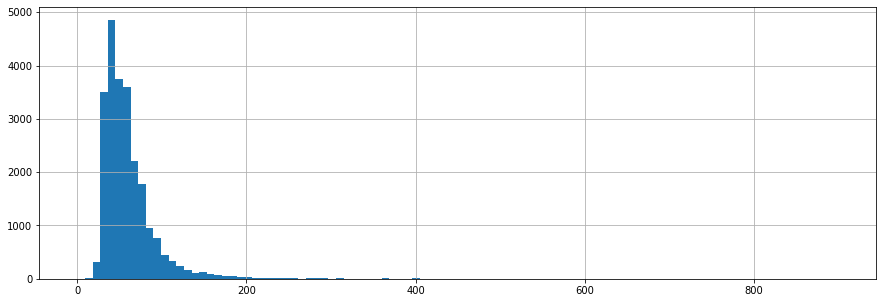

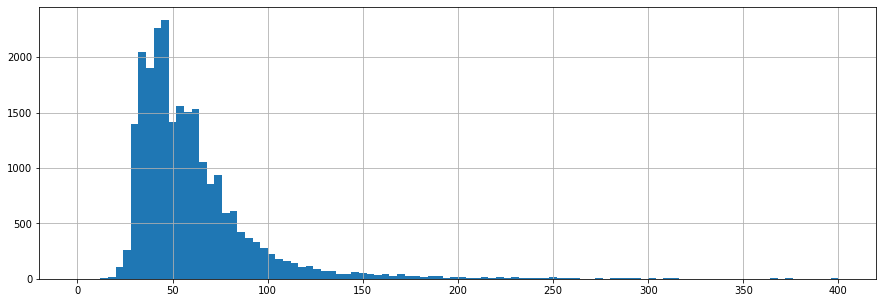

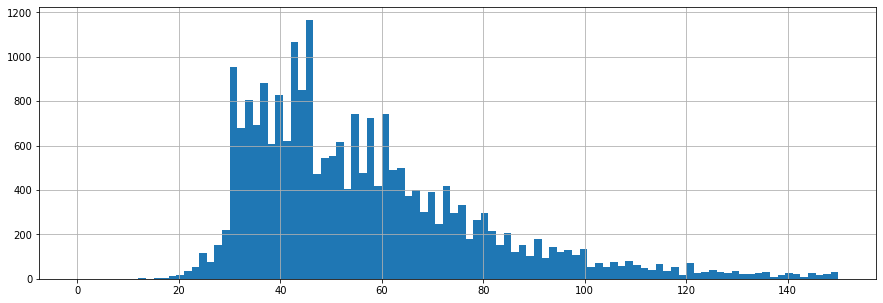

In [27]:
range_total_area = (df['total_area'].max(), 400, 150)
for r in range_total_area:
    df['total_area'].hist(bins=100, range=(0,r), figsize=(15,5))
    plt.show()

Мощный узкий пик около 50 м², достаточно много значений от 30 до 80 м², далее спад, очень мало значений после 150 м² и меньше 25 м², выбросы выше 400 м².

 - гистограммы для параметра цена на момент снятия с публикации (`last_price`)

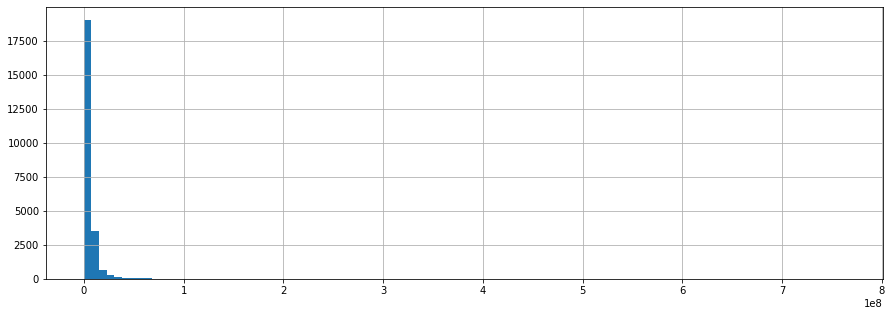

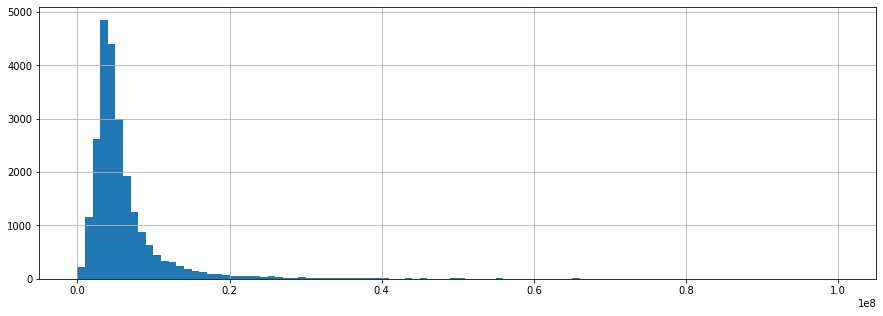

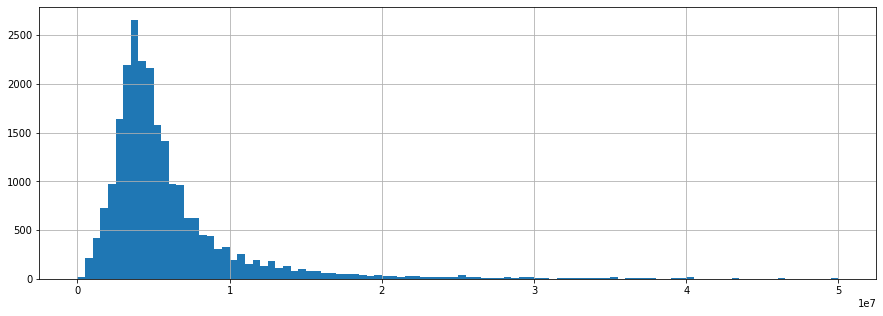

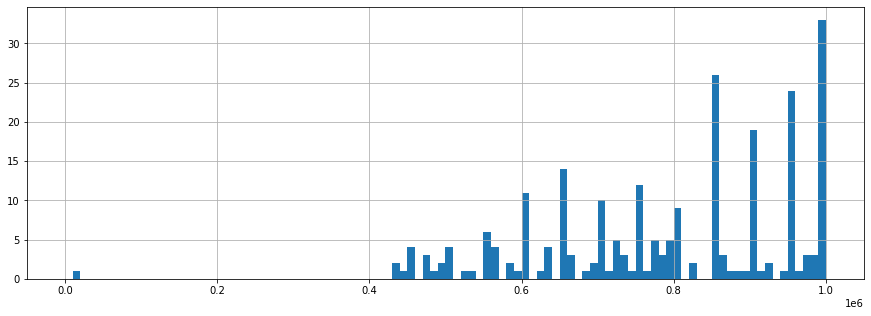

In [28]:
range_last_price = (df['last_price'].max(), 10 ** 8, 5 * 10 ** 7, 10 ** 6)
for r in range_last_price:
    df['last_price'].hist(bins=100, range=(0,r), figsize=(15,5))
    plt.show()

Мощный узкий пик около 4 миллионов, достаточно много значений от 1 до 10 миллионов, далее спад от 10 до 20 миллионов, довольно мало значений от 20 до 50 миллионов, выбросы выше 50 миллионов и меньше 400 000 р.

 - гистограммы для параметра число комнат (`rooms`)

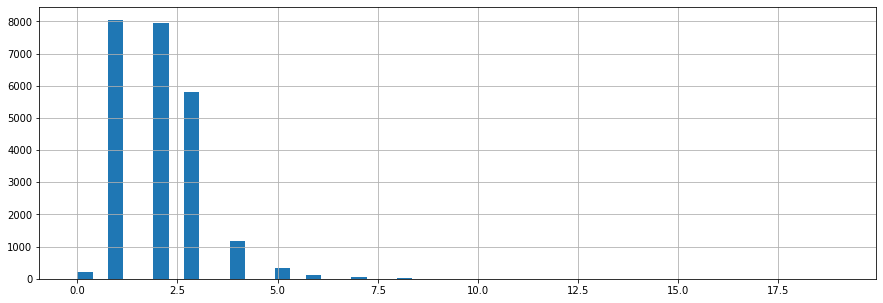

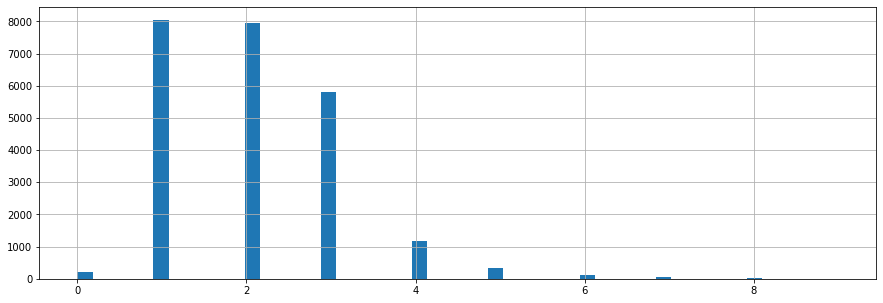

In [29]:
range_rooms = (df['rooms'].max(), 9)
for r in range_rooms:
    df['rooms'].hist(bins=50, range=(0,r), figsize=(15,5))
    plt.show()

От 0 до 6 - нормальное распределение, от 6 до 8 достаточно мало данных, больше 8 комнат - выбросы.

 - гистограммы для параметра высота потолков (`ceiling_height`), м

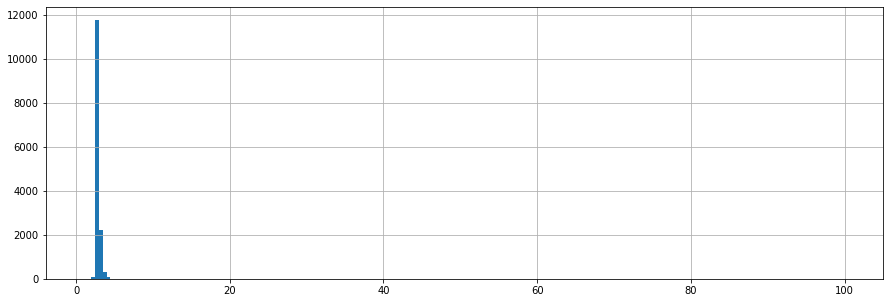

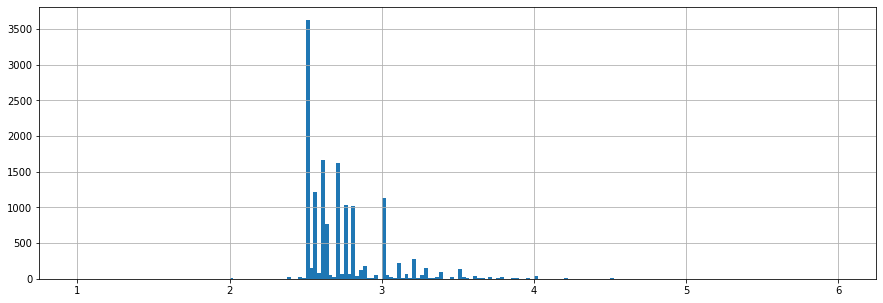

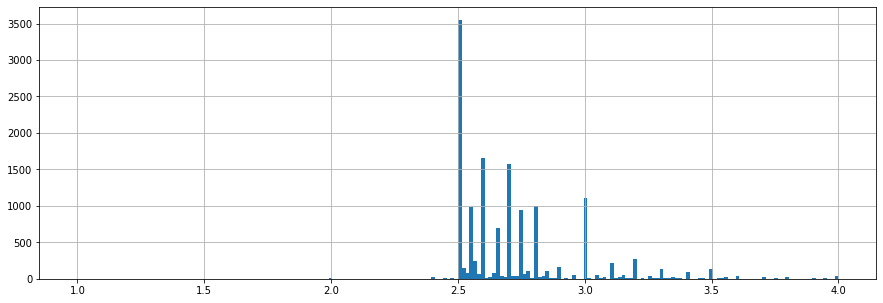

In [30]:
range_ceiling_height = (df['ceiling_height'].max(), 6, 4)
for r in range_ceiling_height:
    df['ceiling_height'].hist(bins=200, range=(1,r), figsize=(15,5))
    plt.show()

Узкий пик на 2,5 м, достаточно много значений от 2,5 до 2,8 м, далее спад и скачок на 3 м, далее снова спад до 3,5 м, меньше 2 м и больше 3,5 м - выбросы.

Продолжим анализ и проверим гипотезы.

### Исследование времени продажи квартиры

Изучим время продажи квартиры `days_exposition ` - сколько дней было размещено объявление (от публикации до снятия)

In [31]:
df[['days_exposition']].describe()

,days_exposition
count,20518.000000
mean,180.888634
std,219.727988
min,1.000000
25%,45.000000
50%,95.000000
75%,232.000000
max,1580.000000


Для наглядного анализа к данному методу добавим гистограммы.

Постороим гистограммы

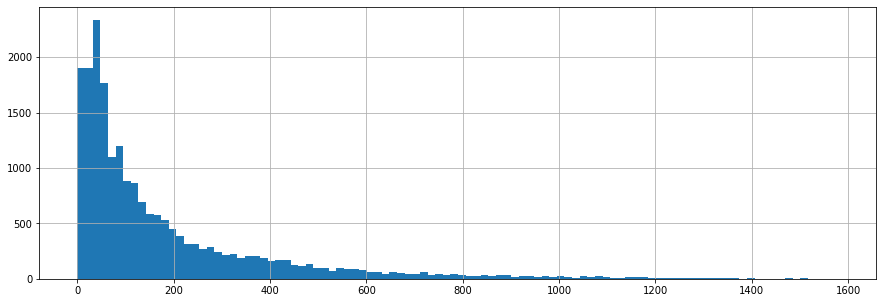

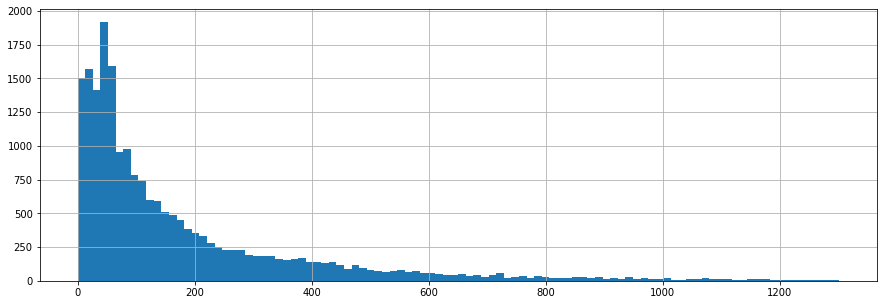

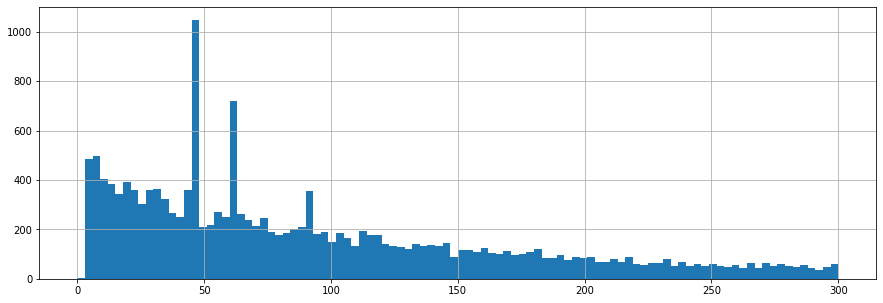

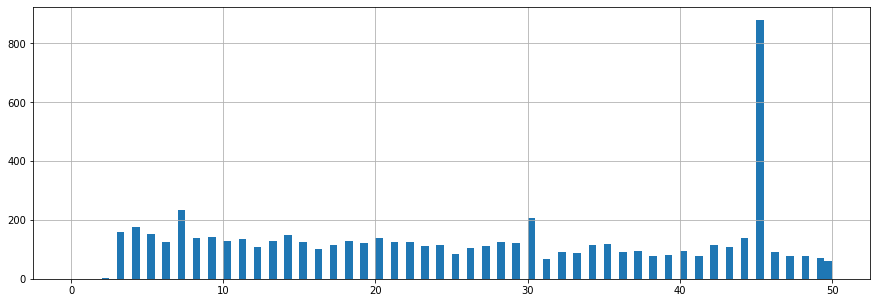

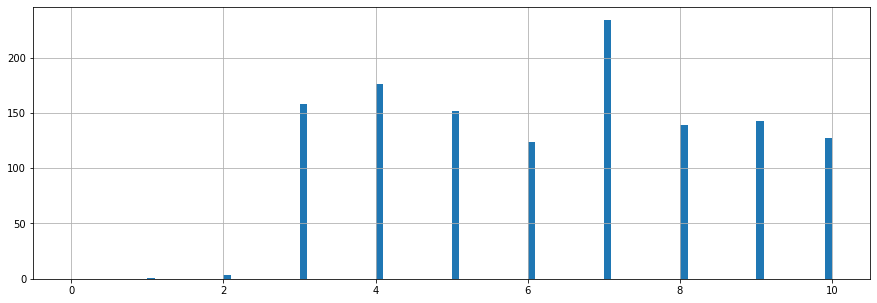

In [32]:
for r in (df['days_exposition'].max(), 1300, 300, 50, 10):
    df['days_exposition'].hist(bins=100, range=(0,r), figsize=(15,5))
    plt.show()

По форме напоминает распределение Пуассона. Несколько выбивающиющихся скачков в диапазоне от 0 до 100. Очень мало значений в диапазоне от 800 до 1500 дней и меньше 3 дней. Больше 1500 дней - выбросы. 

Поймем, чему равняются скачки:

<AxesSubplot:>

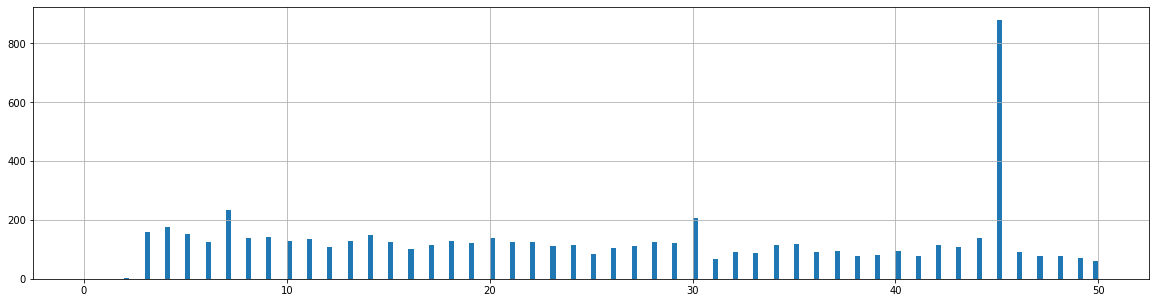

In [33]:
df['days_exposition'].hist(bins=200, range=(0,50), figsize=(20,5))

<AxesSubplot:>

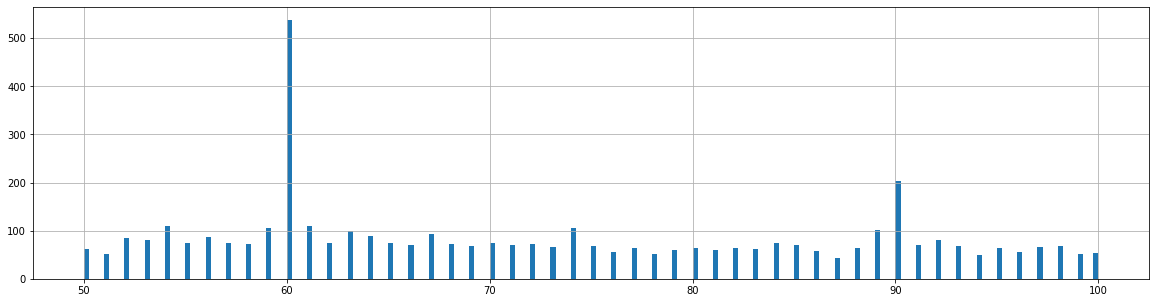

In [34]:
df['days_exposition'].hist(bins=200, range=(50,100), figsize=(20,5))

Скачки равняются примерно 7, 30, 45, 60 и 90 дней. Уточним эти значения применив метод `value_counts` к сгруппированным в нужном диапазоне данным в столбце `days_exposition`.

In [35]:
df.query('0 < days_exposition < 100')['days_exposition'].value_counts().head(10)

45.0    880
60.0    538
7.0     234
30.0    208
90.0    204
4.0     176
3.0     158
5.0     152
14.0    148
9.0     143
Name: days_exposition, dtype: int64

Гипотеза подтвердилась, скачки равняются 7, 30, 45, 60 и 90 дней. Изучив сервис Яндекс Недвижимость https://yandex.ru/support/realty/agency/home/add-ads-housing.html делаем вывод, что скачки связаны с фиксированным сроком публикации объявлений, после которого продлевают далеко не все. 

Cреднее и медиана времени продажи квартир:

In [36]:
print ('Среднее время продажи квартиры', round(df['days_exposition'].mean()), 'дней')   
print ('Медиана времени продажи квартиры', round(df['days_exposition'].median()), 'дня')   

Среднее время продажи квартиры 181 дней
Медиана времени продажи квартиры 95 дня


Среднее в два раза больше медианы из-за наличия в распределении длинного хвоста в высокими значениями или очень больших значений.

Обычно продажа занимает от 3 до 200 дней - вывод сделан на основе гистограмм медианы, среднего значения времени продажи.

Можно считать, что продажи прошли очень быстро, если они заняли менее 3-х дней, а необычно долго, если заняли более 800 дней. Быстрая продажа - не более 95 дней (медиана времени продажи). Более точные выводы сделаем далее.

### Работа с редкими и выбивающимися значениями

Уберем редкие и выбивающиеся значения и сохраним результат в новый датасет `good_df`.


Из анализа в предыдущих разделах сделаны следующие выводы по поводу редких и выбивающихся значений:
- для параметра площадь квартиры (`total_area`), м² - значения больше 150 м² и меньше 25 м²,
- для параметра цена на момент снятия с публикации (`last_price`) - значения больше 20 миллионов и меньше 400 000,
- для параметра число комнат (`rooms`) - больше 6 комнат,
- для параметра высота потолков (`ceiling_height`), м - значения больше меньше 2 и больше 3,5 м,
- для параметра время продажи квартиры (`days_exposition `) - значения меньше 3 и больше 800 дней, а также 7, 30, 45, 60 и 90 дней.

In [37]:
df[['total_area', 'last_price', 'rooms', 'ceiling_height', 'days_exposition']].describe()

,total_area,last_price,rooms,ceiling_height,days_exposition
count,23699.000000,2.369900e+04,23699.000000,14504.000000,20518.000000
mean,60.348651,6.541549e+06,2.070636,2.771499,180.888634
std,35.654083,1.088701e+07,1.078405,1.261056,219.727988
min,12.000000,1.219000e+04,0.000000,1.000000,1.000000
25%,40.000000,3.400000e+06,1.000000,2.520000,45.000000
50%,52.000000,4.650000e+06,2.000000,2.650000,95.000000
75%,69.900000,6.800000e+06,3.000000,2.800000,232.000000
max,900.000000,7.630000e+08,19.000000,100.000000,1580.000000


Построим диаграммы размаха для перечисленных столбцов, чтобы проверить результаты

<ins>диаграммы размаха для параметра площадь квартиры (`total_area`), м²</ins>

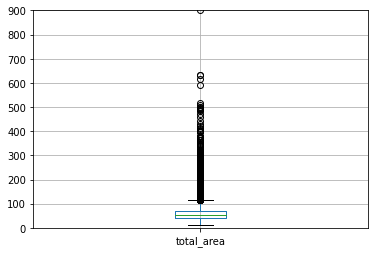

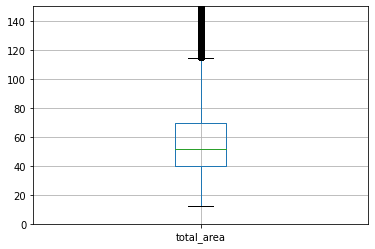

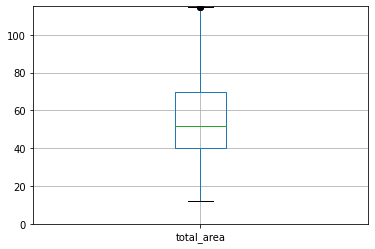

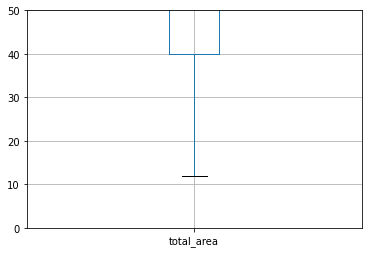

In [38]:
for l in (df['total_area'].max(), 150, 115, 50):
    plt.ylim(0, l)
    df.boxplot(column = 'total_area')   
    plt.show()

- для параметра площадь квартиры (`total_area`), м² нужно исключить значения больше 115 м² (т.к. они за пределами усов), минимальные значения оставим без изменений. 

<ins>диаграммы размаха для параметра `last_price`</ins>

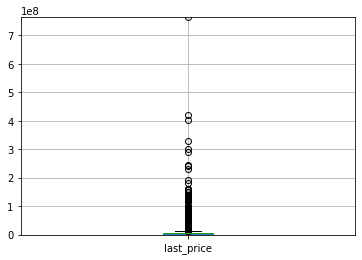

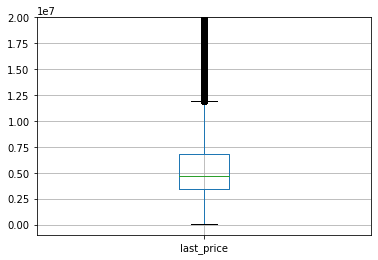

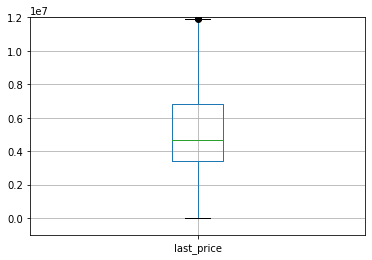

In [39]:
for l in (df['last_price'].max(), 20*10**6, 12*10**6):
    plt.ylim(-10**6, l)
    df.boxplot(column = 'last_price')   
    plt.show()

- для параметра цена на момент снятия с публикации (`last_price`) необходимо исключить значения больше 12 миллионов, минимальные значения оставим без изменений.

<ins>диаграммы размаха для параметра `rooms`</ins>

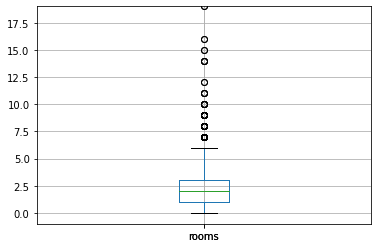

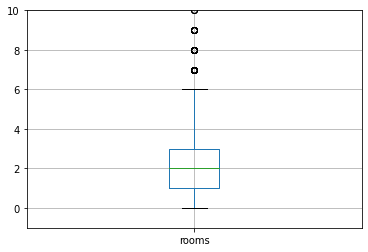

In [40]:
df.boxplot(column = 'rooms')
for l in (df['rooms'].max(), 10):
    plt.ylim(-1, l)
    df.boxplot(column = 'rooms')   
    plt.show()

- для параметра число комнат (`rooms`) необходимо исключить больше 6 комнат, минимальные значения оставим без изменений.

<ins>диаграммы размаха для параметра `ceiling_height`</ins>

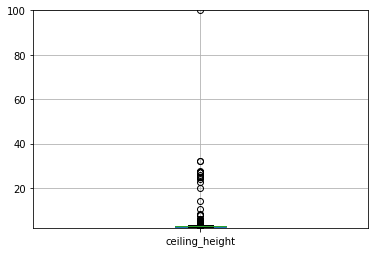

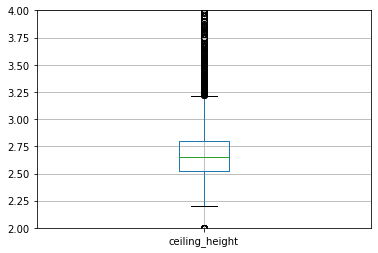

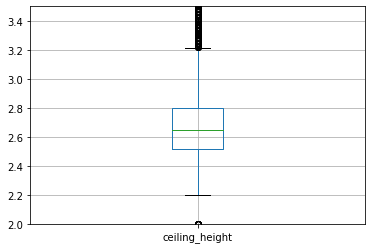

In [41]:
for l in (df['ceiling_height'].max(), 4, 3.5):
    plt.ylim(2, l)
    df.boxplot(column = 'ceiling_height')   
    plt.show()

- для параметра высота потолков (`ceiling_height`), м необходимо исключить значения меньше 2,2 и больше 3,3 м

<ins>диаграммы размаха для параметра `days_exposition`</ins>

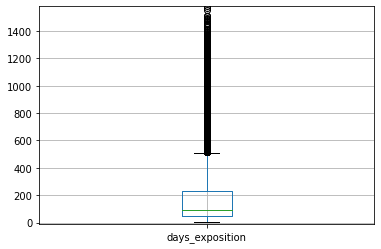

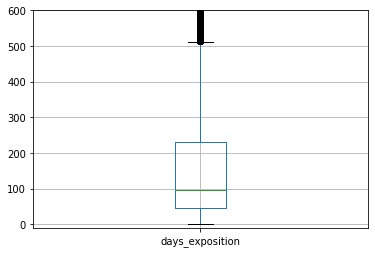

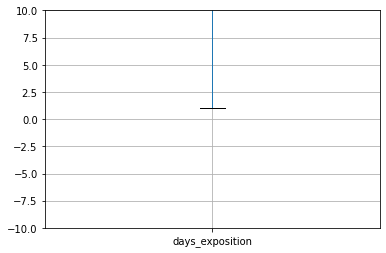

In [42]:
for l in (df['days_exposition'].max(), 600, 10):
    plt.ylim(-10, l)
    df.boxplot(column = 'days_exposition')   
    plt.show()

- для параметра время продажи квартиры (`days_exposition `) необходимо исключить значения больше 510 дней, а также меньше 3, а также 7, 30, 45, 60 и 90 дней (из анализа при помощи гистограмм).

Итог анализа с помощью диаграмм размаха:
- для параметра площадь квартиры (`total_area`), м² нужно исключить значения больше 115 м² (т.к. они за пределами усов), минимальные значения оставим без изменений,
- для параметра цена на момент снятия с публикации (`last_price`) необходимо исключить значения больше 12 миллионов, минимальные значения оставим без изменений,
- для параметра число комнат (`rooms`) необходимо исключить больше 6 комнат, минимальные значения оставим без изменений,
- для параметра высота потолков (`ceiling_height`), м необходимо исключить значения меньше 2,2 и больше 3,3 м,
- для параметра время продажи квартиры (`days_exposition `) необходимо исключить значения больше 510 дней, а также меньше 3 дней, и конкретно 7, 30, 45, 60 и 90 дней (из анализа при помощи гистограмм).

Проверим через формулу выбросов, правильно ли мы трактовали диаграммы размаха:
- выбросы — значения, которые находятся за пределами следующих интервалов: Q1–1.5 x IQR и Q3 + 1.5 x IQR.

In [43]:
good_columns = ['total_area', 'last_price', 'rooms', 'ceiling_height', 'days_exposition']

for good in good_columns:
    Q1 = df[good].quantile(.25)
    Q3 = df[good].quantile(.75)
    IQR = Q3 - Q1
    left = Q1-1.5*IQR
    right = Q3+1.5*IQR
    if left < df[good].min():
        left = df[good].min()
    print (f'Диапазон нормальных значений в столбце {good} от {left.round(1)} до {right.round(1)}') 

Диапазон нормальных значений в столбце total_area от 12.0 до 114.8
Диапазон нормальных значений в столбце last_price от 12190.0 до 11900000.0
Диапазон нормальных значений в столбце rooms от 0 до 6.0
Диапазон нормальных значений в столбце ceiling_height от 2.1 до 3.2
Диапазон нормальных значений в столбце days_exposition от 1.0 до 512.5


Анализ диаграммами размаха подтвердился с более точными числами.
Создадим новый датафрейм `good_data` с отфильтрованными от выбросов значениями:

Сначала заменим пропуски в `ceiling_height` и `days_exposition` медианным значением, как самым устойчивым к выбросам для количественных переменных, чтобы не потерять при фильтрации значительный процент данных

In [44]:
ceiling_height_median = df['ceiling_height'].median()
days_exposition_median = df['days_exposition'].median()
df['ceiling_height'] = df['ceiling_height'].fillna(value=ceiling_height_median)
df['days_exposition'] = df['days_exposition'].fillna(value=days_exposition_median)
print (f'Медианное значение в столбце ceiling_height: {ceiling_height_median}')
print (f'Медианное значение в столбце days_exposition: {days_exposition_median}')

Медианное значение в столбце ceiling_height: 2.65
Медианное значение в столбце days_exposition: 95.0


In [45]:
zero_columns = ['total_area', 'last_price', 'rooms', 'ceiling_height', 'days_exposition']
for zero in zero_columns:
    df[zero] = df[zero].fillna(0)
    print (f'Количество пропущенных значений в столбце {zero}: {len(df[df[zero].isna()])}')    

Количество пропущенных значений в столбце total_area: 0
Количество пропущенных значений в столбце last_price: 0
Количество пропущенных значений в столбце rooms: 0
Количество пропущенных значений в столбце ceiling_height: 0
Количество пропущенных значений в столбце days_exposition: 0


Т.к. по результатам срогих критериев теряется значительная часть данных, то расширим диапазон значений относительно диаграмм размаха для работы с максимальным количеством корректных данных и более точных выводов.

In [46]:
good_df = df.query('total_area <= 200 and\
                   last_price  <= 20*10**6 and\
                   rooms <= 7 and\
                   2.1 <= ceiling_height <= 4 and\
                   days_exposition <= 513')

Проверка:

In [47]:
good_df[['total_area', 'last_price', 'rooms', 'ceiling_height', 'days_exposition']].describe()

,total_area,last_price,rooms,ceiling_height,days_exposition
count,21313.000000,2.131300e+04,21313.000000,21313.000000,21313.000000
mean,55.899192,5.347104e+06,1.988927,2.681504,123.028152
std,23.125537,3.140113e+06,0.959517,0.187174,112.691360
min,12.000000,1.219000e+04,0.000000,2.200000,1.000000
25%,39.500000,3.390000e+06,1.000000,2.600000,45.000000
50%,50.500000,4.500000e+06,2.000000,2.650000,95.000000
75%,66.300000,6.400000e+06,3.000000,2.700000,159.000000
max,200.000000,2.000000e+07,7.000000,4.000000,513.000000


Срез выполнен корректно.

In [48]:
len(good_df)/len(df)

0.8993206464407781

В работе 90% исходного датафрейма.

Редких и выбивающихся значений нет.

Снова посмотрим сводку числовых значений для обновленного датасета

In [49]:
good_df[['total_area', 'last_price', 'rooms', 'ceiling_height', 'days_exposition']].describe()

,total_area,last_price,rooms,ceiling_height,days_exposition
count,21313.000000,2.131300e+04,21313.000000,21313.000000,21313.000000
mean,55.899192,5.347104e+06,1.988927,2.681504,123.028152
std,23.125537,3.140113e+06,0.959517,0.187174,112.691360
min,12.000000,1.219000e+04,0.000000,2.200000,1.000000
25%,39.500000,3.390000e+06,1.000000,2.600000,45.000000
50%,50.500000,4.500000e+06,2.000000,2.650000,95.000000
75%,66.300000,6.400000e+06,3.000000,2.700000,159.000000
max,200.000000,2.000000e+07,7.000000,4.000000,513.000000


Медианы и средние довольно близки. Это неплохой результат. Теперь посмотрим, как изменились гистограммы.

Для начала перезапишем индексы

In [50]:
good_df = good_df.reset_index(drop=True)

 - гистограммы для параметра площадь квартиры (`total_area`), м²

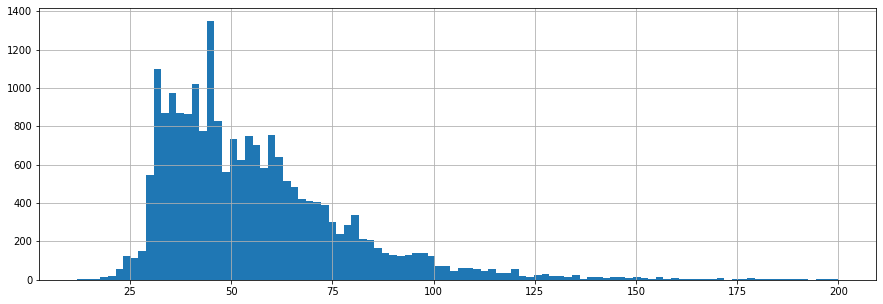

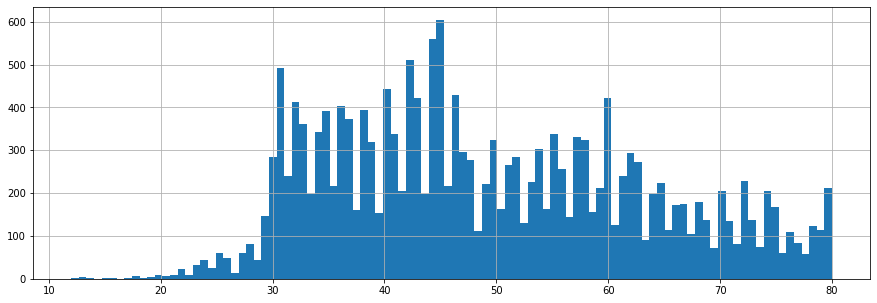

In [51]:
range_total_area = (good_df['total_area'].max(), 80)
for r in range_total_area:
    good_df['total_area'].hist(bins=100, range=(good_df['total_area'].min(),r), figsize=(15,5))
    plt.show()

Большинство квартир в объявлениях с площадями в диапазоне от 30 до 80 м².

 - гистограммы для параметра цена на момент снятия с публикации (`last_price`)

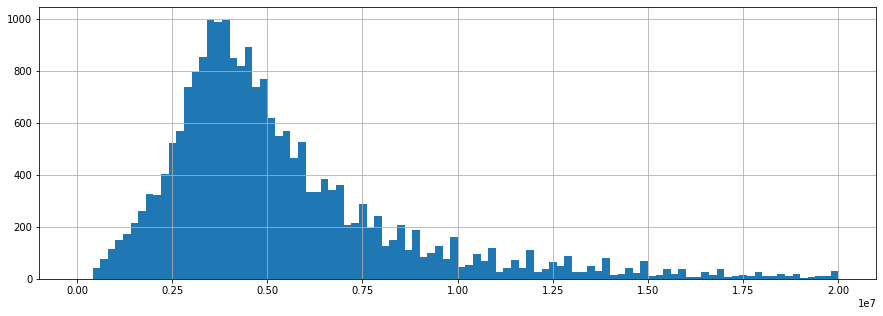

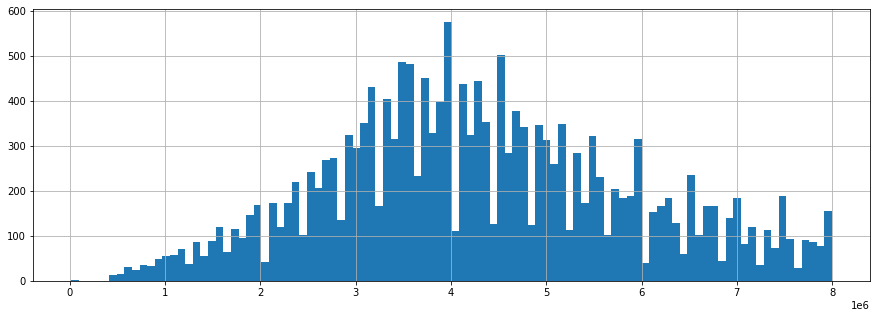

In [52]:
range_total_area = (good_df['last_price'].max(), 0.8*10 ** 7)
for r in range_total_area:
    good_df['last_price'].hist(bins=100, range=(good_df['last_price'].min(),r), figsize=(15,5))
    plt.show()

Большинство квартир в объявлениях с ценой в диапазоне от 3 до 5,5 миллионов, там, где распределение имеет симметричный характер, самые распространенные 4-4,5 миллиона.

 - гистограммы для параметра число комнат (`rooms`)

<AxesSubplot:>

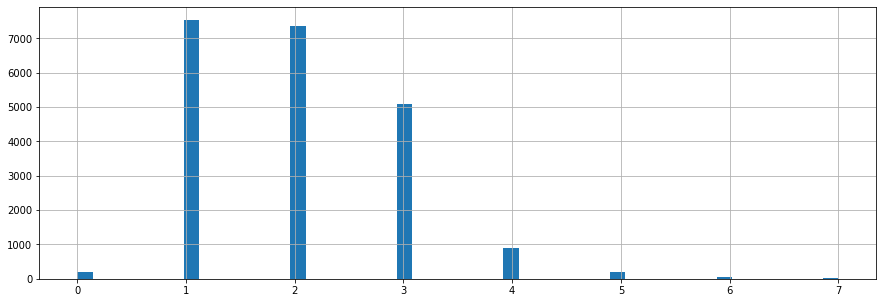

In [53]:
good_df['rooms'].hist(bins=50, figsize=(15,5))

Добавим для наглядности круговую диаграмму:

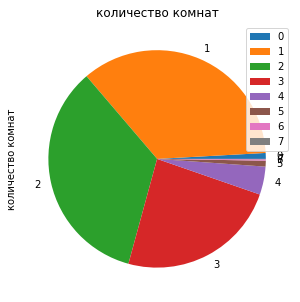

In [54]:
good_df.groupby('rooms',dropna=False)['rooms'].agg(['count']).plot(kind='pie', y='count', figsize=(5, 5), label="количество комнат")
plt.title('количество комнат')
plt.show();

1 и 2-комнатные квартиры доминируют в объявлениях, 3-комнатных меньше, остальные более редкие.

- гистограммы для параметра высота потолков (`ceiling_height`), м

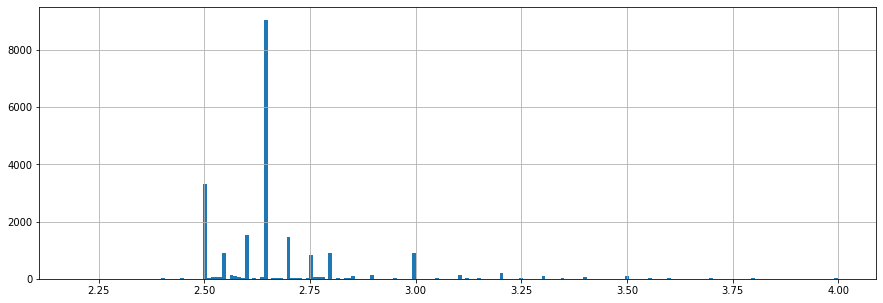

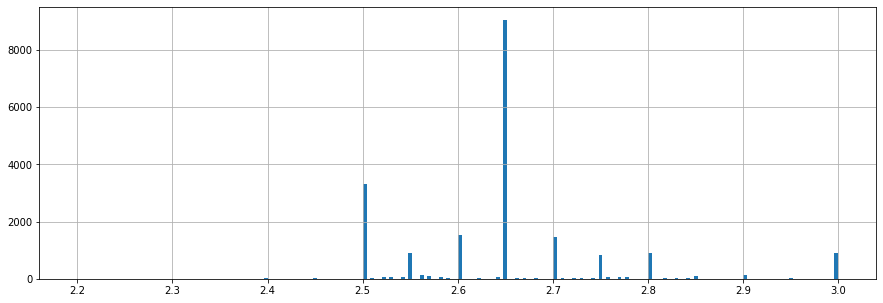

In [55]:
range_ceiling_height = (good_df['ceiling_height'].max(), 3)
for r in range_ceiling_height:
    good_df['ceiling_height'].hist(bins=200, range=(good_df['ceiling_height'].min(),r), figsize=(15,5))
    plt.show()

Большинство квартир в объявлениях с высотой потолков от 2,5 до 3 м, самые распространенные - около 2,65 м.

- гистограммы для параметра время продажи квартиры `days_exposition ` (в днях от публикации до снятия)

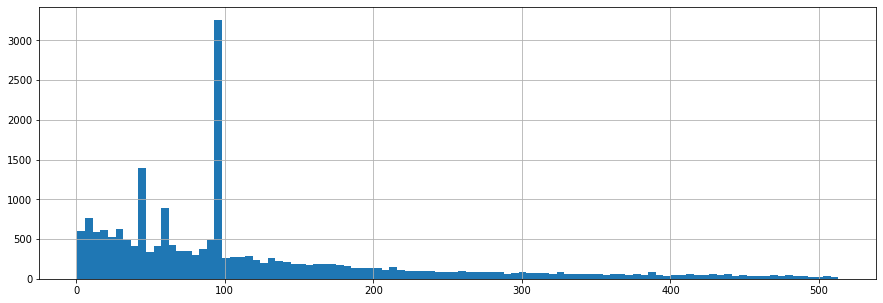

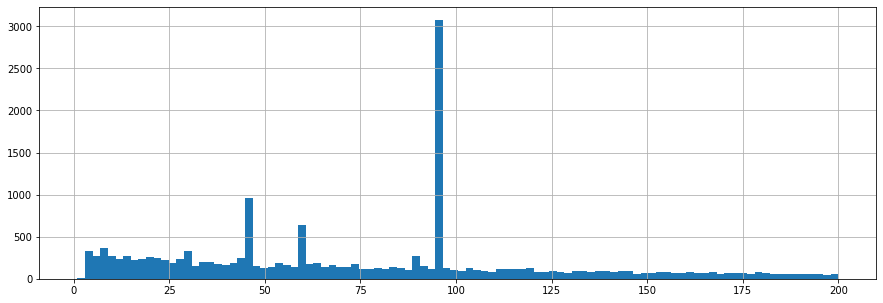

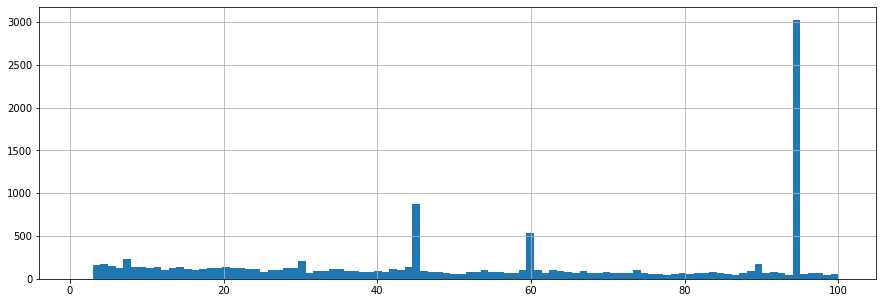

In [56]:
for r in (good_df['days_exposition'].max(), 200, 100):
    good_df['days_exposition'].hist(bins=100, range=(good_df['days_exposition'].min(),r), figsize=(15,5))
    plt.show()

Большинство объявлений квартир с длительностью от 3 (глянул в describe()) до 200 дней, самые распространенные - от 3 до 90 дней. Т.е. либо объявление не продлевают через 3 месяца, либо большинство квартир продаются в течение 3 месяцев.

<ins>Итог по проведенному выше анализу:</ins>

- 1) Большинство квартир в объявлениях с площадями в диапазоне от 30 до 80 м².
- 2) Большинство квартир в объявлениях с ценой в диапазоне от 3 до 5,5 миллионов, там, где распределение имеет симметричный характер, самые распространенные 4-4,5 миллиона.
- 3) 1 и 2-комнатные квартиры доминируют в объявлениях, 3-комнатных меньше, остальные более редкие.
- 4) Большинство квартир в объявлениях с высотой потолков от 2,5 до 3 м, самые распространенные - около 2,65 м.
- 5) Большинство объявлений квартир с длительностью от 3 до 200 дней, самые распространенные - от 3 до 90 дней. Т.е. либо объявление не продлевают через 3 месяца, либо большинство квартир продаются в течение 3 месяцев.

### Факторы, влияющие на стоимость квартиры

#### Изучим, зависит ли цена от площади, числа комнат, удалённости от центра.

Напомним наименования исследуемых параметров:
- `last_price` — цена на момент снятия с публикации
- `total_area` — площадь квартиры в квадратных метрах (м²)
- `rooms` — число комнат
- `city_centers_nearest` — расстояние до центра города (м)

Взглянем на коэффициенты корреляции между средними значениями в исследуемых столбцах.

In [57]:
good_df.pivot_table(index=good_df.index, values=['last_price','total_area','city_centers_nearest','rooms']).corr()

,city_centers_nearest,last_price,rooms,total_area
city_centers_nearest,1.000000,-0.347194,-0.133746,-0.189607
last_price,-0.347194,1.000000,0.500405,0.771982
rooms,-0.133746,0.500405,1.000000,0.796800
total_area,-0.189607,0.771982,0.796800,1.000000


Здесь можно сделать следующие выводы:
- между ценой и площадью квартир прямая зависимость, т.к. коэффициент корреляции положительный
- между ценой и числом комнат прямая зависимость, т.к. коэффициент корреляции положительный
- между ценой и расстоянием до центра города обратная зависимость, т.к. коэффициент корреляции отрицательный

Взаимосвязь между ценой и площадью квартир сильнее, чем между ценой и расстоянием до центра города и ценой и числом комнат т.к. коэффициент корреляции Пирсона ближе к крайнему значению: 1.

Построим диаграммы рассеяния 

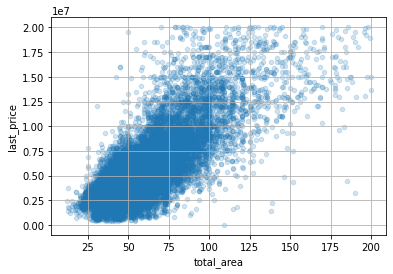

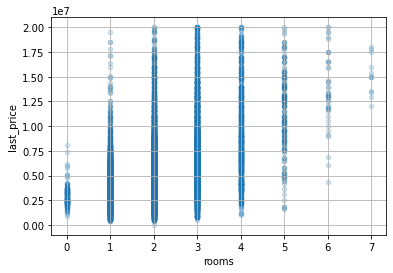

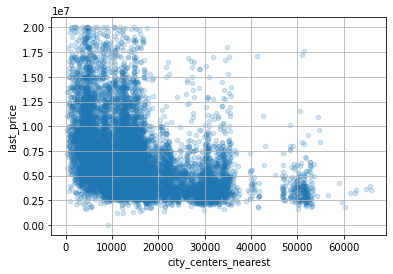

In [58]:
for column in ('total_area', 'rooms', 'city_centers_nearest'):
    good_df.plot(
    kind='scatter',
    x=column,
    y='last_price',
    grid=True,
    alpha=0.2
    )
    plt.show()

Дополним ранее сделанные выводы:
- с увеличением площади цена растёт
- с увеличением количества комнат цена также растёт, но те так линейно
- с удаленностью от центра цена падает и количество объявлений снижается, опять же зависимость менее линейная, чем при сравнении с площадью

#### Изучим зависимость цены от того, на каком этаже расположена квартира: первом, последнем или другом.

Напомним наименования исследуемых параметров:
- `last_price` — цена на момент снятия с публикации
- `floor_category` — категория этажа (первый, последний или другой)

In [59]:
good_df.pivot_table(index='floor_category', values='last_price', aggfunc={'count','median', 'mean'})

,count,mean,median
floor_category,,,
другой,15749,5.577045e+06,4700000.0
первый,2646,4.349293e+06,3850000.0
последний,2918,5.010866e+06,4190000.0


Корректнее оценивать по медиане (хотя в среднем аналогичный по зависимостям результат)
- цена на первом < цены на последнем < цены других
- объявлений на других этажах больше, чем на первом и последнем

Для наглядности дополним выводы столбчатой диаграммой 

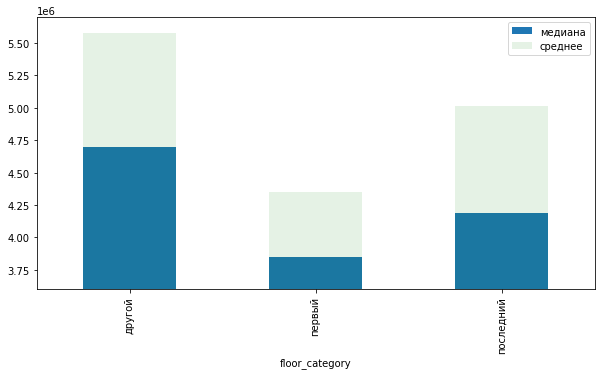

In [60]:
ax = good_df.pivot_table(index='floor_category',
                         values='last_price',
                         aggfunc='median').plot(kind='bar',
                                                y='last_price',
                                                figsize=(10, 5),
                                                ylim=(3600000, 5700000),
                                                alpha=1,
                                               label='медиана')
good_df.pivot_table(index='floor_category',
                    values='last_price').plot(kind='bar',
                                         y='last_price',
                                         figsize=(10, 5),
                                         alpha=0.1,
                                         ax=ax, color = 'g',
                                        label='среднее');

Выводы подтвердились графически.

#### Изучим зависимость цены от даты размещения: дня недели, месяца и года.

Напомним наименования исследуемых параметров:
- `last_price` — цена на момент снятия с публикации
- `weekday` - день недели, цифры 0-6 означают номер дня недели с понедельника (0) по воскресенье (6) соответственно.
- `month` - месяц
- `year` - год

Для понимания объективности анализа перед каждым графиком будем выводить количество объявлений по каждому параметру.

<ins>День недели</ins>

In [61]:
good_df.pivot_table(index='weekday', values='last_price', aggfunc='count')

,last_price
weekday,
0,3250
1,3764
2,3554
3,3810
4,3641
5,1756
6,1538


Сгрупируем данные в столбце 'weekday' по медиане и среднему значению стоимости и построим столбчатые диаграммы на общих осях:

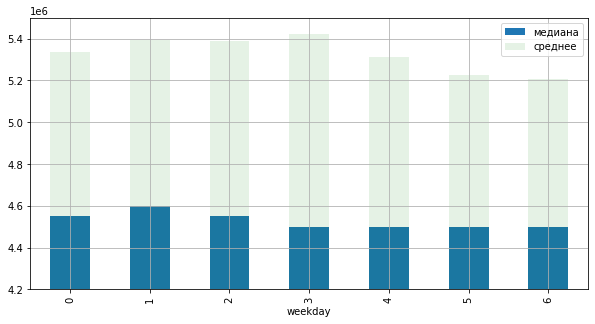

In [62]:
ax = good_df.pivot_table(index='weekday',
                         values='last_price',
                         aggfunc='median').plot(kind='bar',
                                                y='last_price',                                                
                                                figsize=(10, 5),
                                                ylim=(4200000, 5500000),
                                                alpha=1,
                                               label='медиана')
good_df.pivot_table(index='weekday',
                    values='last_price').plot(kind='bar',
                                         y='last_price',
                                         figsize=(10, 5),
                                         alpha=0.1,
                                         ax=ax, color = 'g',
                                        label='среднее',
                                        grid=True);

Итого по дню недели:
- в середине недели (со вторника по четверг) размещают объявления с более дорогой ценой (вывод по медиане)
- количество объявлений в эти дни также значительное для признания результатов объективными

<ins>Месяц</ins>

In [63]:
good_df.pivot_table(index='month', values='last_price', aggfunc='count')

,last_price
month,
1,1339
2,2399
3,2305
4,2179
5,1103
6,1547
7,1520
8,1601
9,1795


Сгрупируем данные в столбце `month` по медиане и среднему значению стоимости и построим столбчатые диаграммы на общих осях:

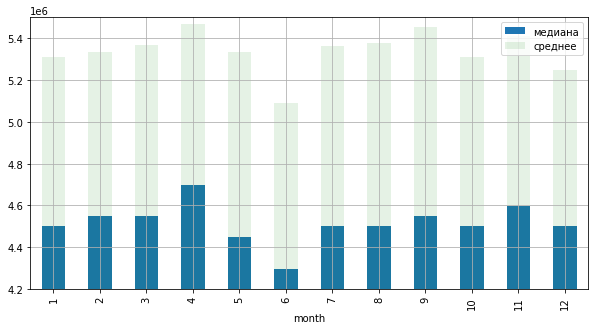

In [64]:
ax = good_df.pivot_table(index='month',
                         values='last_price',
                         aggfunc='median').plot(kind='bar',
                                                y='last_price',
                                                figsize=(10, 5),
                                                ylim=(4200000, 5500000),
                                                alpha=1,
                                               label='медиана')
good_df.pivot_table(index='month',
                    values='last_price').plot(kind='bar',
                                         y='last_price',
                                         figsize=(10, 5),
                                         alpha=0.1,
                                         ax=ax, color = 'g',
                                        label='среднее',
                                        grid=True);

Итого по месяцам:
- количественный анализ показал, что с результатами по каждому месяцу нужно считаться
- самые дорогие объявления с максимальной ценой - в апреле и ноябре, с минимальной - в мае, скорее всего, связано с отпусками.

<ins>Год</ins>

In [65]:
good_df.pivot_table(index='year', values='last_price', aggfunc='count')

,last_price
year,
2014,12
2015,516
2016,2098
2017,7614
2018,8293
2019,2780


Сгрупируем данные в столбце `year` по медиане и среднему значению стоимости и построим столбчатые диаграммы на общих осях:

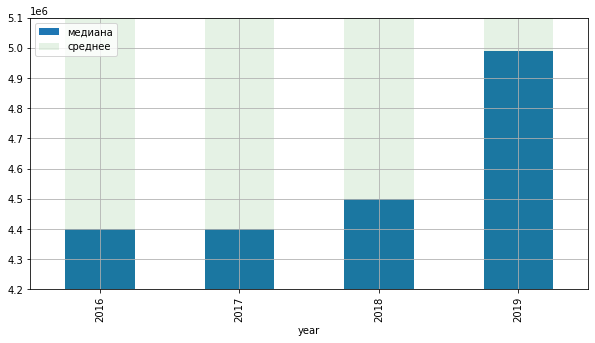

In [66]:
ax = good_df.query('year > 2015').pivot_table(index='year',
                         values='last_price',
                         aggfunc='median').plot(kind='bar',
                                                y='last_price',
                                                figsize=(10, 5),
                                                ylim=(4200000, 5100000),
                                                alpha=1,
                                               label='медиана')
good_df.query('year > 2015').pivot_table(index='year',
                    values='last_price').plot(kind='bar',
                                         y='last_price',
                                         alpha=0.1,
                                         ax=ax, color = 'g',
                                        label='среднее',
                                        grid=True);

Итого по годам:
- количественный анализ показал, что с результатами за 2014 и 2015 годы считаться не стоит (мало объявлений)
- в 2016 и 2017 годах цены примерно одинаковы и ниже, чем в 2018 и в 2019.
- очевидно, цена объявлений растет с 2017 года, в 2019 году цена максимальная, хотя также объявлений не так много, возможно, год ещё не был закончен на момент составления базы данных
- выводы сделаны на основе медианных значений стоимости, как наиболее устойчивых к выбросам для количественных переменных, т.к. среднее значительно превышает медиану

### 10 населённых пунктов с наибольшим числом объявлений

Напомним наименования исследуемых параметров
- `locality_name` — название населённого пункта
- `meter_area` - цена квадратного метра

Выберем 10 населённых пунктов с наибольшим числом объявлений, посчитаем среднюю цену квадратного метра в этих населённых пунктах и выделим среди них населённые пункты с <ins>самой высокой</ins> и <ins>самой низкой</ins> стоимостью жилья.

In [67]:
good_locality = good_df.pivot_table(index='locality_name',
                                   values='meter_area',
                                   aggfunc={'count','mean'}).sort_values(by='count', ascending=False).head(10)
good_locality.columns = ['count', 'mean_area']
good_locality = good_locality.sort_values(by='mean_area', ascending=False)
good_locality

,count,mean_area
locality_name,,
Санкт-Петербург,13891,108679.089331
Пушкин,332,101640.617988
деревня Кудрово,268,92670.928672
посёлок Парголово,312,90053.545746
посёлок Мурино,489,85947.150881
посёлок Шушары,420,78620.782911
Колпино,323,75247.365425
Гатчина,283,68959.229267
Всеволожск,364,67137.835663


Закрепим результаты графически

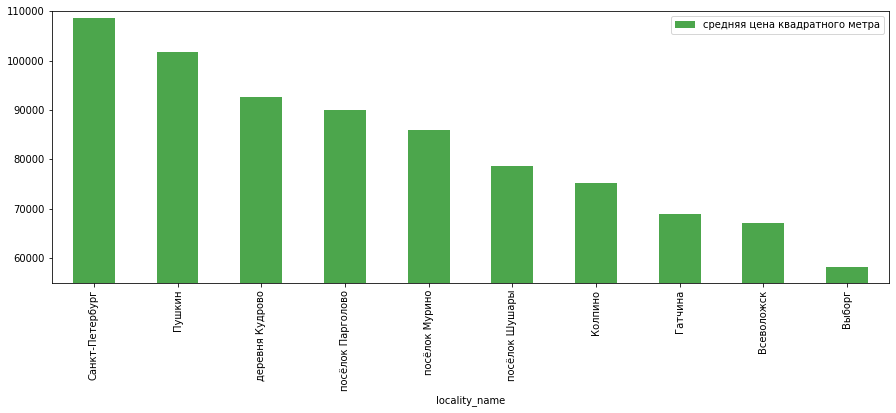

In [68]:
good_locality.plot(kind='bar',
                   y='mean_area',
                   figsize=(15, 5),
                   ylim=(55000, 110000),
                   alpha=0.7,
                   label='средняя цена квадратного метра',
                   color = 'g');

Итого из 10 населённых пунктов с наибольшим числом объявлений:
- самая высокая  стоимость жилья в Санкт-Петербурге
- самая низкая стоимость жилья во Выборге

### Анализ цены в зависимости от удаленности от центра

Напомним наименования исследуемых параметров
- `last_price` — цена на момент снятия с публикации
- `locality_name` — название населённого пункта
- `city_centers_nearest` — расстояние до центра города (м)

Изучим предложения квартир: для каждой квартиры есть информация о расстоянии до центра.

In [69]:
good_df[['locality_name', 'city_centers_nearest']].head()

,locality_name,city_centers_nearest
0,Санкт-Петербург,16028.0
1,посёлок Шушары,18603.0
2,Санкт-Петербург,8098.0
3,городской посёлок Янино-1,NaN
4,посёлок Парголово,19143.0


Выделим квартиры в Санкт-Петербурге и создадим столбец с расстоянием до центра в километрах, округлив его значения до целых.

In [70]:
good_df['city_centers_nearest_km'] = (good_df['city_centers_nearest']/1000).round()
good_spb = good_df.query('locality_name == "Санкт-Петербург"')
good_spb[['locality_name',
         'city_centers_nearest',
         'city_centers_nearest_km']].head(3)

,locality_name,city_centers_nearest,city_centers_nearest_km
0,Санкт-Петербург,16028.0,16.0
2,Санкт-Петербург,8098.0,8.0
5,Санкт-Петербург,11634.0,12.0


Посчитаем среднюю цену для каждого километра.

In [71]:
good_price_km = good_spb.pivot_table(index='city_centers_nearest_km', values='last_price')
good_price_km.head(3)

,last_price
city_centers_nearest_km,
0.0,9.981667e+06
1.0,1.067960e+07
2.0,9.896848e+06


Построим график, показывающий, как цена зависит от удалённости от центра.

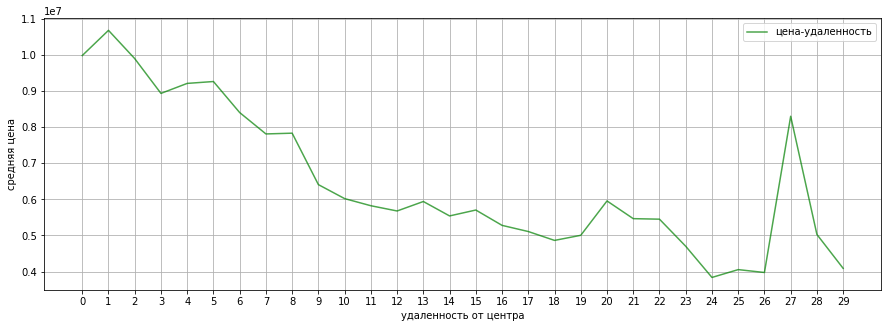

In [72]:
good_price_km.plot(y='last_price',
                  style='-',
                  grid=True,
                   figsize=(15, 5),
                   alpha=0.7,
                   ylabel='средняя цена',
                   xlabel='удаленность от центра',
                   label='цена-удаленность',
                   color = 'g',
                   xticks = range(30));

Границ, где график меняет свою форму несколько: 9, 26, 28 км.
Пример в качестве центральной зоны от 0 до 9 км.

Итог:
- в центральной зоне (от 0 до 9 км) цена уменьшается при удалении от центра.
- в целом, при удаленности от центра цена падает, за исключением района на расстоянии 28 км.

### Анализ сегмента квартир в центре и факторов, влияющих на их стоимость

Напомним наименования исследуемых параметров:
- `total_area` — площадь квартиры в квадратных метрах (м²)
- `last_price` — цена на момент снятия с публикации
- `rooms` — число комнат
- `ceiling_height` — высота потолков (м)
- `floor` — этаж
- `floor_category` — категория этажа — первый, последний, другой
- `city_centers_nearest_km` — расстояние до центра города (км)
- `first_day_exposition` — дата публикации
- `weekday` - день недели, цифры 0-6 означают номер дня недели с понедельника (0) по воскресенье (6) соответственно.
- `month` - месяц
- `year` - год

Выделим сегмент квартир в центре. 

In [73]:
good_spb_center = good_spb.query('0 <= city_centers_nearest_km <= 9')
good_spb_center[['locality_name','city_centers_nearest_km']].head(3)

,locality_name,city_centers_nearest_km
2,Санкт-Петербург,8.0
20,Санкт-Петербург,2.0
44,Санкт-Петербург,7.0


Проанализируем сегмент квартир в центре и изучим следующие параметры: площадь, цена, число комнат, высота потолков.

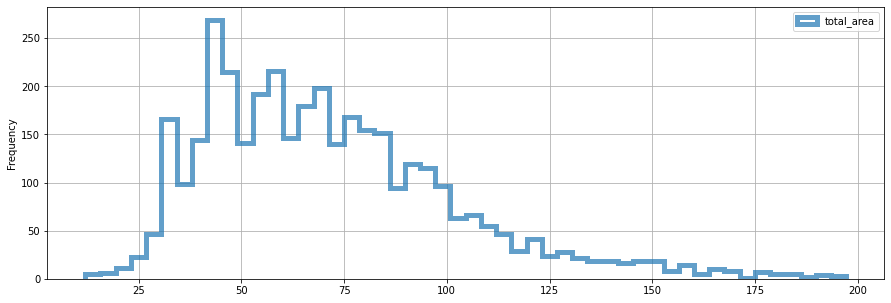

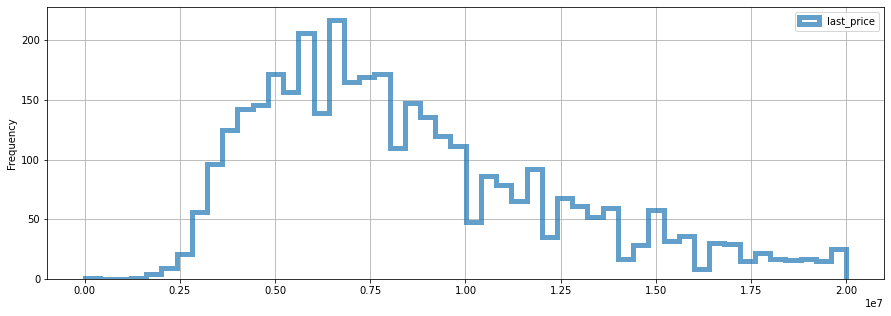

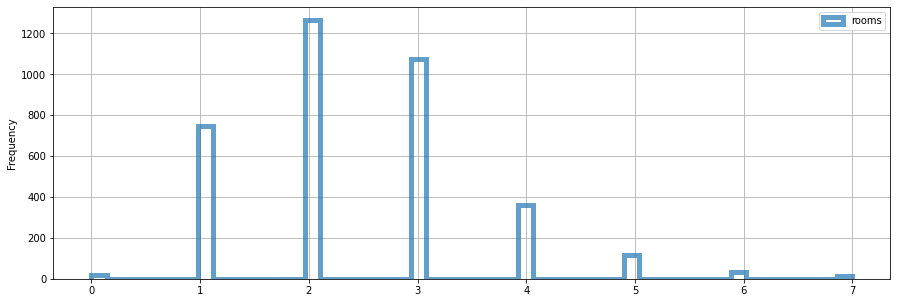

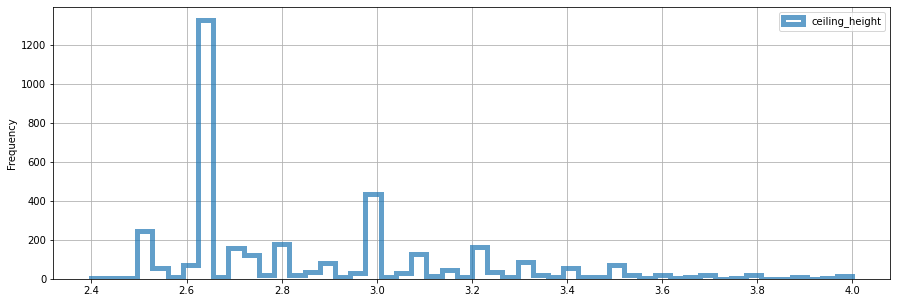

In [74]:
for column in ('total_area', 'last_price', 'rooms', 'ceiling_height'):
    good_spb_center.plot(
        kind='hist',
        y=column,
        histtype='step',
        bins=50,
        linewidth=5,
        alpha=0.7,
        figsize=(15, 5),
        grid=True
        )

Итог.

В центре большинство квартир:
- площадью 30-100 м², 
- ценой 3-10 миллионов,
- числом комнат 1-3,
- высотой потолков 2,5-3,2 м.

<div class="alert alert-success">
<b>Комментарий ревьюера ✔️:</b>  👍 Здорово, эффективный код и наглядная визуализация

<ins>Выделим факторы, которые влияют на стоимость квартиры:</ins>
- число комнат,
- этаж,
- удалённость от центра,
- дата размещения объявления

In [75]:
good_spb_center[['last_price',
                 'rooms',
                 'floor',
                 'city_centers_nearest_km',
                'total_area',
                 'first_day_exposition']].head(3)

,last_price,rooms,floor,city_centers_nearest_km,total_area,first_day_exposition
2,10000000.0,2,13,8.0,100.0,2018-06-19
20,6500000.0,2,1,2.0,97.2,2015-10-31
44,11795000.0,6,2,7.0,136.0,2017-09-22


Построим столбчатые диаграммы, отражающие зависимость от средней цены следующих параметров:
- числа комнат,
- этажа,
- удалённости от центра.

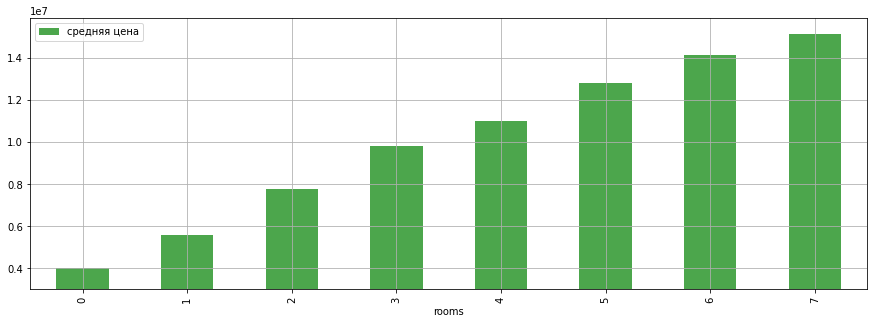

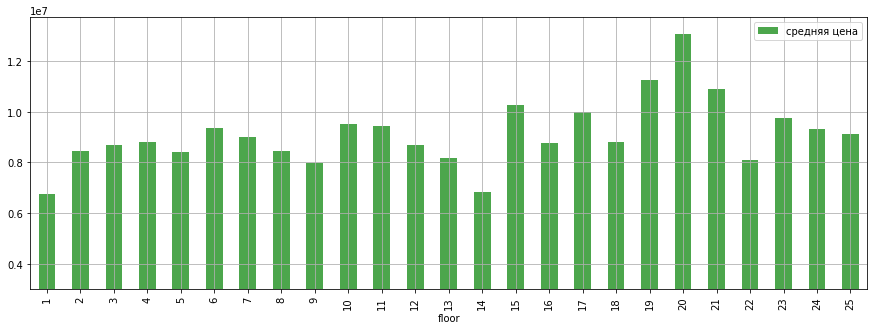

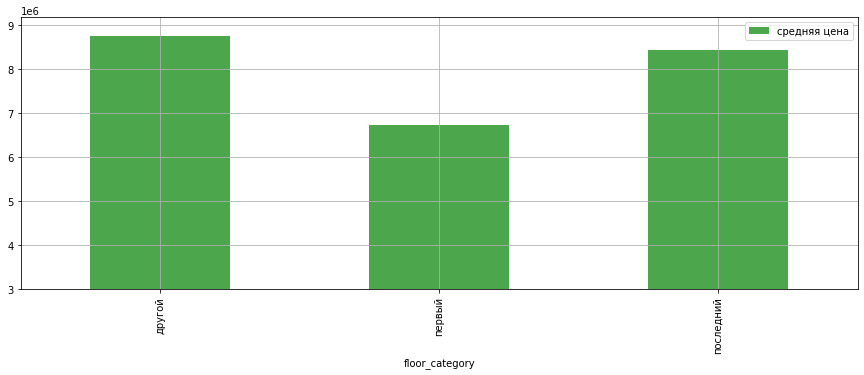

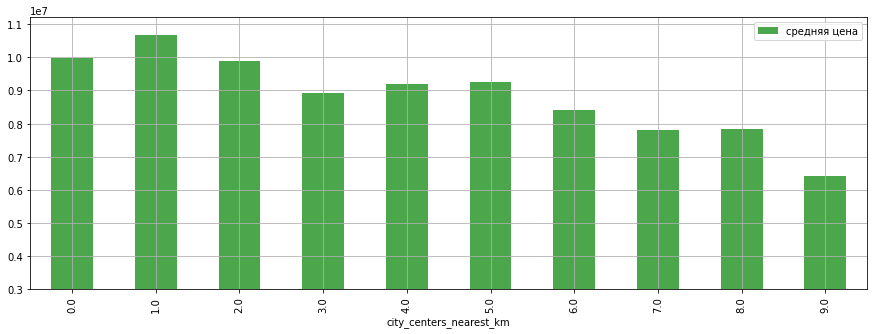

In [76]:
for column in ('rooms', 'floor', 'floor_category', 'city_centers_nearest_km'):
    good_spb_center.pivot_table(index=column, values='last_price').plot(kind='bar',
                                                                       y='last_price',
                                                                       figsize=(15, 5),
                                                                       alpha=0.7,
                                                                       label='средняя цена',
                                                                       color = 'g',
                                                                       ylim=3*10**6,
                                                                       grid=True)

Итог.
- С ростом числа комнат с 0 до 5 зависимость ярко выраженная, цена увеличивается быстрее, от 5 до 7 комнат цена также увеличивается, но уже незначительно.
- С увеличением этажа цена колеблется, есть незначительный рост цены, но говорить, что на последнем этаже цена максимальная нельзя, т.к. из сравнения результатов для 'floor', 'floor_category' видно, что на последнем этаже цена ниже, чем на другом, кроме первого.
- С увеличением расстояния от центра цена колеблется, есть тенденция к уменьшению цены.

Посмотрим на коэффициенты корреляции, отражающие зависимость от средней цены следующих параметров:
- числа комнат,
- этажа,
- удалённости от центра.

In [77]:
good_spb_center[['last_price',
                 'rooms',
                 'floor',
                 'city_centers_nearest_km']].corr()

,last_price,rooms,floor,city_centers_nearest_km
last_price,1.000000,0.524570,0.095936,-0.266445
rooms,0.524570,1.000000,-0.124396,-0.260720
floor,0.095936,-0.124396,1.000000,0.283239
city_centers_nearest_km,-0.266445,-0.260720,0.283239,1.000000


- Зависимость от числа комнат прямая и самая ярко выраженная.
- Зависимость от этажа также прямая, но корреляция невысока, определить закономерность сложнее.
- Зависимость от удаленности обратная, с увеличением расстояния цена падает, корреляция невысока, закономерность неявная.

Графический анализ подтвердился.

Построим диаграмму рассеяния, отражающую зависимость даты от цены квартиры в объявлении:

<AxesSubplot:xlabel='first_day_exposition', ylabel='last_price'>

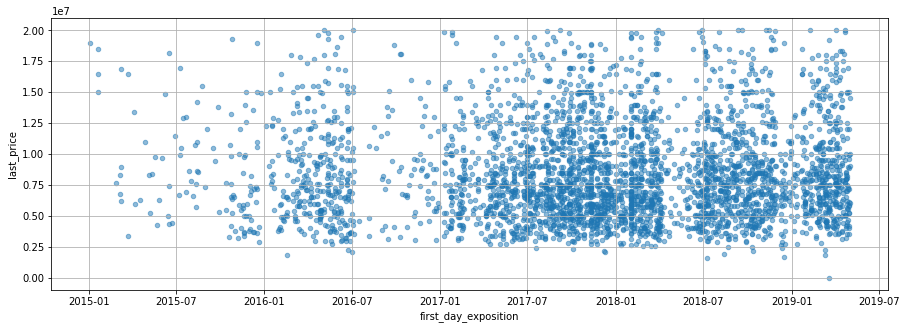

In [78]:
good_spb_center.plot(
                    kind='scatter',
                    x='first_day_exposition',
                    y='last_price',
                    grid=True,
                    alpha=0.5,
                    figsize=(15, 5)
                    )

Явной зависимости нет. Можно сказать только, что максимальное количество объявлений квартир с середины 2017 по конец 2018 года.

Посмотрим на коэффициенты корреляции, отражающие зависимость от средней цены следующих параметров:
- дня недели
- месяца
- года

In [79]:
for number in ('weekday', 'month', 'year'):
    corr_number = good_spb_center[number].corr(good_spb_center['last_price'])
    print (f'Корреляция в столбце {number}: {corr_number.round(3)}')

Корреляция в столбце weekday: -0.006
Корреляция в столбце month: -0.009
Корреляция в столбце year: 0.004


Графический анализ подтвердился - зависимости нет, т.к. коэффициенты низкие.

<ins>Сравнение выводов для сегмента квартир в центре с общими выводами по базе:</ins>

- <ins>в центре площадь больше.</ins>

- <ins>в центре цена дороже.</ins>

- <ins>в целом по количеству комнат в центре и во всей исследуемой области ситуация схожа 1-3 комнатные квартиры пользуются наибольшим спросом.</ins>

- <ins>в центре квартиры выше.</ins>

- <ins>в Санкт-Петербурге и области с увеличением количества комнат цена растёт, аналогичный вывод для центра Санкт-Петербурга.</ins>

- <ins>в центре цена последнего этажа сравнима с ценой любого другой непервого, в отличие от области.</ins>

- <ins>в Санкт-Петербурге и области с удаленностью от центра цена падает, аналогичный вывод для центра Санкт-Петербурга.</ins>

- <ins>в центре Санкт-Петербурга и области явной зависимости цены от даты нет.</ins> 

## Общий вывод

<ins>Была поставлена задача "установить параметры, определяющие рыночную стоимость объектов недвижимости".</ins>

Произведена фильтрация данных от выбросов и аномалий.
При работе с "чистыми" данными пришли к следующим выводам.

<ins>Рыночную стоимость объектов недвижимости необходимо определять по следующим критериям:</ins>

- квартиры площадью от 30 до 80 м²,
- квартиры ценой от 3 до 5,5 миллионов,
- 1-3-комнатные квартиры,
- высотой потолков от 2,5 до 3 м.
- квартиры с длительностью объявления от 3 до 200 дней.

<ins>Факторы, влияющие на стоимость квартиры:</ins>
- площадь: с увеличением площади цена растёт
- количество комнат: с увеличением количества комнат цена растёт,
- удаленность от центра: с удаленностью от центра цена падает,
- этаж: цена на первом < цены на последнем < цены других,
- день недели: в середине недели размещают объявления с более высокой ценой,
- месяц: самые дорогие объявления с максимальной ценой - в апреле и ноябре, с минимальной - в мае (думаю связано с отпусками),
- год: с 2017 года по 2019 год (последний год в датафрейме) цена растёт, есть тендеция к дальнейшему росту.

<ins>Из 10 населённых пунктов с наибольшим числом объявлений:</ins>
- самая высокая  стоимость жилья в Санкт-Петербурге,
- самая низкая стоимость жилья в Выборге.